In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from numpy import random as rand
from math import e
from tqdm import tqdm
from scipy import integrate
import random

In [3]:
#v is a vector cointanining N elements, each of which has two variables: α and s (s = 0 for defection, s = 1 for cooperation)

def game(v,macrosteps,pars):
                 
    N = len(v)
    vec_a_mean=[]           #empty vector to be filled with the mean value of alpha at each for loop
    vec_x=[]                #empty vector to be filled with the fraction of cooperators at each for loop
    s1_vec=v[:,1]
    a1_vec=v[:,0]     
    T= -pars['p']*pars['cd']*(1-pars['d'])
    P= -pars['p']*pars['cd']
    
    for t in macrosteps:
        
        v = np.transpose(np.array([a1_vec,s1_vec]))
        amean = np.mean(v[:,0])                       #updated mean of alpha
        vec_a_mean = np.append(vec_a_mean, amean)   
        x = np.mean(v[:,1])                           #updated fraction of cooperators
        vec_x = np.append(vec_x, x)        
        cumulative_payoffs=[]  
        pi = np.zeros(N)
        s1_vec=[]
        a1_vec=[]
        
        for player in range(N):
            a1,s1 = v[player]
            
            R= -pars['p']*pars['cd']*(1-pars['e'])*(1-pars['d'])-(1-a1)*pars['cn']
            S= -pars['p']*pars['cd']*(1-pars['e'])-(1-a1)*pars['cn']
            
            pp= s1*x*(N-1)*R + s1*(1-x)*N*S + (1-s1)*x*N*T + (1-s1)*(1-x)*(N-1)*P
            
            cumulative_payoffs = np.append(cumulative_payoffs,pp)
                
        for pos1 in range(N):
            pos2 = random.choice(list(range(0,pos1)) + list(range(pos1+1,N)))
            a1,s1 = v[pos1]                       #alpha,strategy of player 1
            s2 = v[pos2][1]                       #strategy of player 2
            
            if s1==s2: 
                s1_new = s1
            
            else:
                pi_1=cumulative_payoffs[pos1]
                pi_2=cumulative_payoffs[pos2]
                delta_pi = pi_2-pi_1              
                prob = 1/(1+e**(-pars['beta']*delta_pi))
                
                s1_new = s2 if np.random.random() < prob else s1
            
            a1_new = a1 + pars['gamma']*(2*x-1)*a1*(1-a1)
            a1_new = np.clip(a1_new, 0.001, 0.999)
                
            s1_vec=np.append(s1_vec,s1_new)
            a1_vec=np.append(a1_vec,a1_new)
        
        if np.isin(s1_vec, 0).all() or np.isin(s1_vec, 1).all():
            break
        
    return v, vec_x, vec_a_mean, np.mean(s1_vec), np.mean(a1_vec)

In [55]:
# Parameters
pars={}         
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.75
pars['gamma']=1
pars['beta']=1

N=20   
macrosteps = np.linspace(0,100,100)
coop = np.linspace(0,20,11)               #number of initial cooperators
f_coop_c=[]
A=0
dict_coop = {}          #dictionary to store the vectors final_coop_vec for each n_coop

for n_coop in coop:
    f_het=[]
    #create a dictionary to store the vectors final_coop_vec for each n_coop
    nums = np.zeros(N)
    nums[:int(n_coop)] = 1
    np.random.shuffle(nums)

    for delta in tqdm(np.linspace(0,1,5), desc = 'Progress Bar'):
        final_coop_vec=[]
        
        for i in range(500):   
            A = 0.5 - delta/2
            B = 0.5 + delta/2      
            al = np.append(np.full(int(N/2),A),np.full(int(N/2),B))          
            np.random.shuffle(al)

            v = np.transpose(np.array([al,nums]))
            r = game(v,macrosteps,pars)
            
            final_coop_vec = np.append(final_coop_vec,r[3])
            
        f_het = np.append(f_het,  final_coop_vec.mean())

    dict_coop[n_coop] = f_het

Progress Bar: 100%|██████████| 5/5 [00:01<00:00,  3.58it/s]


In [56]:
dict_coop

{0.0: array([0., 0., 0., 0., 0.]),
 2.0: array([0.   , 0.   , 0.   , 0.008, 0.724]),
 4.0: array([0.   , 0.   , 0.   , 0.1  , 0.944]),
 6.0: array([0.   , 0.   , 0.006, 0.408, 0.996]),
 8.0: array([0.   , 0.   , 0.122, 0.752, 1.   ]),
 10.0: array([0.   , 0.002, 0.494, 0.96 , 1.   ]),
 12.0: array([0.006, 0.098, 0.85 , 1.   , 1.   ]),
 14.0: array([0.224, 0.616, 0.994, 1.   , 1.   ]),
 16.0: array([0.928, 0.978, 1.   , 1.   , 1.   ]),
 18.0: array([1., 1., 1., 1., 1.]),
 20.0: array([1., 1., 1., 1., 1.])}

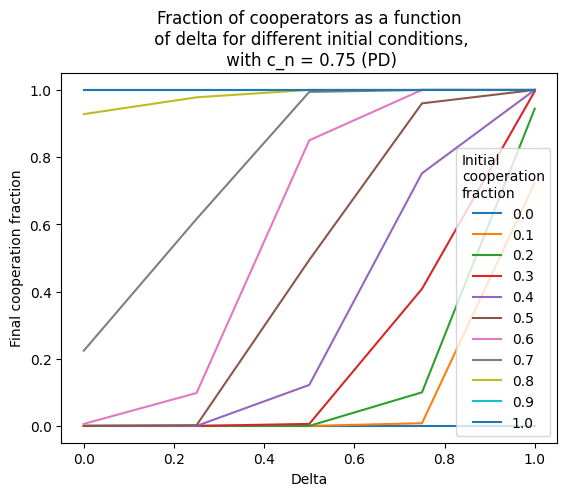

In [57]:
for key in dict_coop:
    plt.plot(np.linspace(0,1,5), dict_coop[key], label = key/20)
    plt.legend(title='Initial\ncooperation\nfraction', loc='lower right')
    plt.xlabel('Delta')
    plt.ylabel('Final cooperation fraction')
    plt.title('Fraction of cooperators as a function\n of delta for different initial conditions,\n with c_n = 0.75 (PD)')
plt.show()

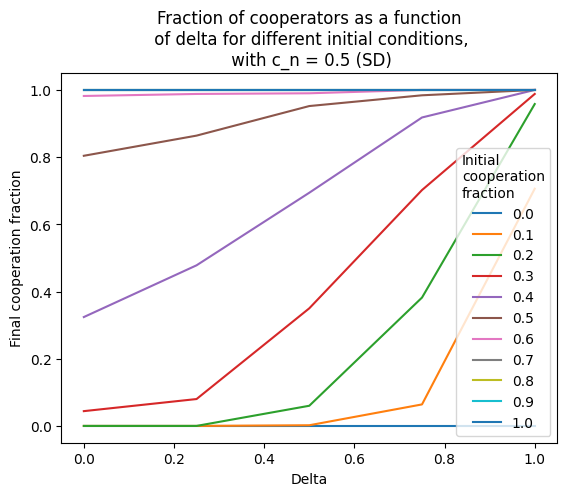

In [54]:
for key in dict_coop:
    plt.plot(np.linspace(0,1,5), dict_coop[key], label = key/20)
    plt.legend(title='Initial\ncooperation\nfraction', loc='lower right')
    plt.xlabel('Delta')
    plt.ylabel('Final cooperation fraction')
    plt.title('Fraction of cooperators as a function\n of delta for different initial conditions,\n with c_n = 0.5 (SD)')
plt.show()

In [69]:
# Parameters
pars={}         
pars['p']=0.4
pars['cd']=1
pars['e']=0.9
pars['d']=0.5
pars['cn']=0.2
pars['gamma']=1
pars['beta']=1

N=20   
macrosteps = np.linspace(0,100,100)
coop = np.linspace(0,20,11)               #number of initial cooperators
f_coop_c=[]
A=0
dict_coop = {}          #dictionary to store the vectors final_coop_vec for each n_coop

for delta in tqdm(np.linspace(0,1,5), desc = 'Progress Bar'):
    f_het=[]

    for n_coop in coop:
        final_coop_vec=[]
        
        #create a dictionary to store the vectors final_coop_vec for each n_coop
        nums = np.zeros(N)
        nums[:int(n_coop)] = 1
        np.random.shuffle(nums)
        
        for i in range(500):   
            A = 0.5 - delta/2
            B = 0.5 + delta/2      
            al = np.append(np.full(int(N/2),A),np.full(int(N/2),B))          
            np.random.shuffle(al)

            v = np.transpose(np.array([al,nums]))
            r = game(v,macrosteps,pars)
            
            final_coop_vec = np.append(final_coop_vec,r[3])
            
        f_het = np.append(f_het,  final_coop_vec.mean())

    dict_coop[delta] = f_het

Progress Bar: 100%|██████████| 5/5 [00:53<00:00, 10.78s/it]


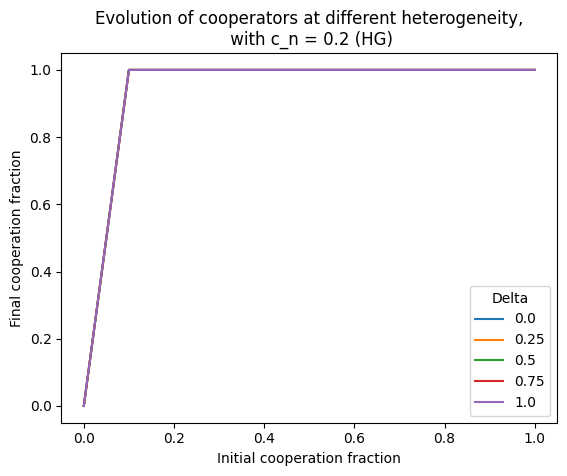

In [70]:
for key in dict_coop:
    plt.plot(np.linspace(0,1,11), dict_coop[key], label = key)
    plt.legend(title='Delta', loc='lower right')
    plt.xlabel('Initial cooperation fraction')
    plt.ylabel('Final cooperation fraction')
    plt.title('Evolution of cooperators at different heterogeneity,\n with c_n = 0.2 (HG)')
plt.show()

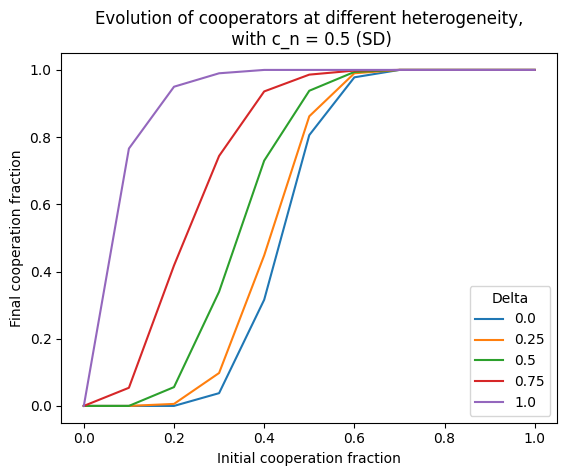

In [68]:
for key in dict_coop:
    plt.plot(np.linspace(0,1,11), dict_coop[key], label = key)
    plt.legend(title='Delta', loc='lower right')
    plt.xlabel('Initial cooperation fraction')
    plt.ylabel('Final cooperation fraction')
    plt.title('Evolution of cooperators at different heterogeneity,\n with c_n = 0.5 (SD)')
plt.show()

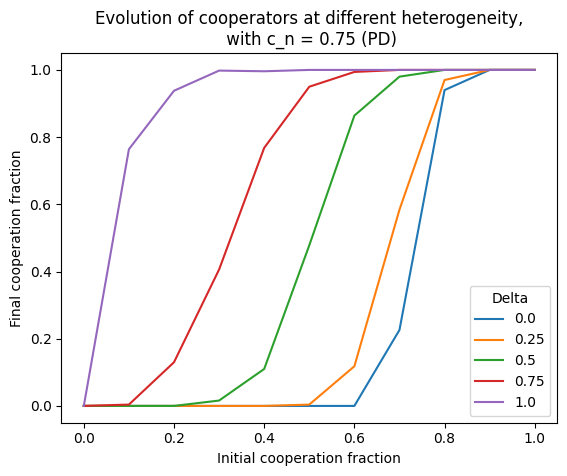

In [66]:
for key in dict_coop:
    plt.plot(np.linspace(0,1,11), dict_coop[key], label = key)
    plt.legend(title='Delta', loc='lower right')
    plt.xlabel('Initial cooperation fraction')
    plt.ylabel('Final cooperation fraction')
    plt.title('Evolution of cooperators at different heterogeneity,\n with c_n = 0.75 (PD)')
plt.show()